# Object Detection from Image 

## First, we need to import necessary imports

In [3]:
from darkflow.net.build import TFNet
import numpy as np
import time

In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Setting up our options

If you do not have a gpu you can turn off to gpu options, to obtain a better result also you can increase the threshold.

In [6]:
options = {
    'model': 'cfg/tiny-yolo-voc-custom.cfg',
    'load': 2000,                             
    'threshold': 0.1,                       # this number can be higher if the performance is better
    'gpu': 1.0                               
}

### The model has trained on Nvdia GTX 2080 SLI 

In [7]:
tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-custom.cfg
Loading None ...
Finished in 8.39233398438e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13,

In [7]:
img = cv2.imread('test/test_data/p_322.jpg', cv2.IMREAD_COLOR)
img

array([[[ 19,  80,  42],
        [ 20,  81,  45],
        [ 28,  86,  51],
        ...,
        [ 14,  70,  29],
        [ 15,  72,  33],
        [ 12,  69,  30]],

       [[ 15,  88,  42],
        [ 20,  91,  48],
        [ 26,  94,  53],
        ...,
        [  8,  66,  25],
        [  9,  66,  27],
        [ 11,  66,  27]],

       [[ 26,  89,  50],
        [ 33,  94,  56],
        [ 35,  96,  60],
        ...,
        [  5,  65,  24],
        [  5,  62,  23],
        [  6,  61,  22]],

       ...,

       [[107, 116, 130],
        [114, 123, 137],
        [121, 130, 144],
        ...,
        [189, 185, 190],
        [176, 176, 182],
        [170, 172, 180]],

       [[114, 124, 141],
        [117, 127, 144],
        [121, 130, 143],
        ...,
        [190, 187, 189],
        [184, 185, 189],
        [174, 177, 181]],

       [[133, 135, 153],
        [129, 131, 149],
        [136, 138, 156],
        ...,
        [171, 174, 178],
        [177, 181, 186],
        [171, 175, 180]]

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
result = tfnet.return_predict(img)

img.shape

(662, 1000, 3)

Result variable is a array which holds dictionary in every element. As you can see the below, what it holds respectively, localization of object which is come from YOLO, confidence value, label.

In [10]:
result

[{'bottomright': {'x': 171, 'y': 230},
  'confidence': 0.27490798,
  'label': 'pothole',
  'topleft': {'x': 63, 'y': 150}},
 {'bottomright': {'x': 160, 'y': 240},
  'confidence': 0.20565377,
  'label': 'pothole',
  'topleft': {'x': 73, 'y': 202}},
 {'bottomright': {'x': 733, 'y': 442},
  'confidence': 0.3646461,
  'label': 'pothole',
  'topleft': {'x': 398, 'y': 315}}]

If we sort the array in order to confidence value we can obtain most probable result.

In [11]:
sorted_result = sorted(result, key=lambda k: k['confidence'],reverse=True) 

In [12]:
sorted_result

[{'bottomright': {'x': 733, 'y': 442},
  'confidence': 0.3646461,
  'label': 'pothole',
  'topleft': {'x': 398, 'y': 315}},
 {'bottomright': {'x': 171, 'y': 230},
  'confidence': 0.27490798,
  'label': 'pothole',
  'topleft': {'x': 63, 'y': 150}},
 {'bottomright': {'x': 160, 'y': 240},
  'confidence': 0.20565377,
  'label': 'pothole',
  'topleft': {'x': 73, 'y': 202}}]

In [13]:
for i in range(len(sorted_result)-2):
    tl = (sorted_result[i]['topleft']['x'], sorted_result[i]['topleft']['y'])
    br = (sorted_result[i]['bottomright']['x'], sorted_result[i]['bottomright']['y'])
    label = sorted_result[i]['label']
    print(sorted_result[i]["confidence"])

0.3646461


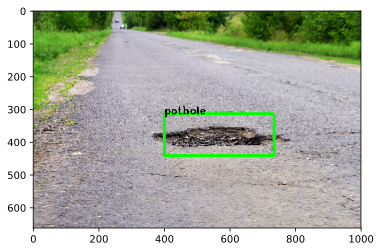

In [14]:
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7) # draw a ractangle onto an image
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2) # add laebl name
    plt.imshow(img)
    plt.show()

In [1]:
capture = cv2.VideoCapture('pothole.mkv')
colors = [tuple(255 * np.random.rand(3)) for i in range(10)]

NameError: name 'cv2' is not defined

In [ ]:
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()# ret is a boolean. True when the video is playing.
    if ret:
        results = tfnet.return_predict(frame)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break